# MSE Homework 6

In [1]:
from thermostate import Q_
import math
import numpy as np

# Problem 6.7 

For a brass alloy, the stress at which plastic deformation begins is 345 MPa (50,000 psi), and the modulus of
elasticity is 103 GPa (15.0 × 10$^6$ psi).

(a) What is the maximum load that can be applied to a specimen with a cross-sectional area of 130 mm$^2$
(0.2 in$^2$) without plastic deformation?

(b) If the original specimen length is 76 mm (3.0 in.), what is the maximum length to which it can be
stretched without causing plastic deformation?

# Solution

Part a:

$\sigma = \frac{F}{A_o}$

Where:

$F$ is force applied 

$A_o$ is the initial cross-sectional area

In [2]:
stress_y = Q_(345, "MPa")
A_o = Q_(130, "mm^2") 
F = stress_y * A_o
print(F.to("N").round(2))

44850.0 newton


Part b:

$E = \frac{\sigma}{\epsilon}$

$\qquad \epsilon_y = \frac{\sigma_y}{E}$

$\epsilon = \frac{\Delta l}{l_o}$

max length$= l_o + \Delta l$

In [3]:
E = Q_(103, "GPa")
l_o = Q_(76, "mm")
strain_y = stress_y / E
delta_l = strain_y * l_o
max_l = l_o + delta_l
print(max_l.round(2))

76.25 millimeter


# Problem 6.10 

Consider a cylindrical specimen of a steel alloy (Figure 6.22) 8.5 mm (0.33 in.) in diameter and 80 mm (3.15
in.) long that is pulled in tension. Determine its elongation when a load of 65,250 N (14,500 lbf) is applied

# Solution

$\sigma = \frac{F}{A_o}$

$E = \frac{\sigma}{\epsilon} = 270$ GPa for Table 6.1

$\epsilon = \frac{\Delta l}{l_o}$

Rearranging the above yields:

$\Delta l = l_o(\frac{F/A_o}{E})$

In [4]:
E = Q_(270, "GPa")
F = Q_(65250, "N")
d = Q_(8.5, "mm")
A_o = math.pi * d **2 /4
l_o = Q_(80, "mm")

print((F/A_o).to("MPa").round(2))

delta_l = l_o*(F/A_o)/(E)
print(delta_l.to("mm").round(2))

1149.88 megapascal
0.34 millimeter


# Problem 6.11 

Figure 6.23 shows the tensile engineering stress–strain curve in the elastic region for a gray cast
iron. Determine:

(a) the tangent modulus at 25 MPa (3625 psi)

(b) the secant modulus taken to 35 MPa (5000 psi).

Tangent Modulus 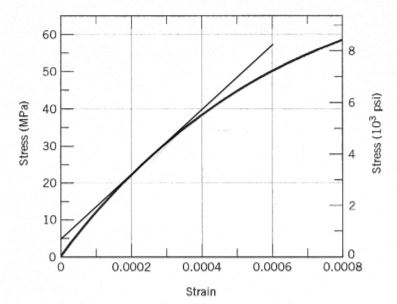
Seceant Modulus 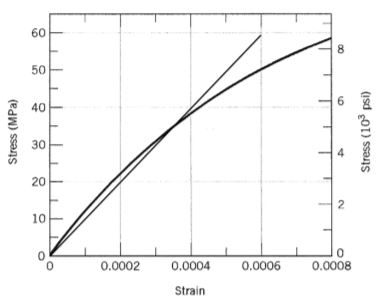

# Solution

Tangent modulus $=\frac{d\sigma}{d\epsilon} = \frac{55-5}{0.0006-0} = 83.33$ GPa

Secant modulus $=\frac{\sigma - 0}{\epsilon - 0} = \frac{60-0}{0.0006-0} = 100$ GPa

# Problem 6.19 

Consider a cylindrical specimen of some hypothetical metal alloy that has a diameter of 10.0 mm (0.39 in.). A tensile force of 1500 N (340 lbf) produces an elastic reduction in diameter of 6.7 × 10$^{–4}$ mm (2.64 × 10$^{–5}$ in.). Compute the elastic modulus of this alloy, given that Poisson’s ratio is 0.35.

# Solution

$E = \frac{\sigma}{\epsilon}\qquad \sigma=\frac{F}{A_o}$

$0.35 = -\frac{\epsilon_{reduce}}{\epsilon_{extend}} = \frac{\frac{6.7\times 10^{-4}}{10}}{\epsilon}$

In [5]:
l_o = Q_(-6.7e-4, "mm")
d = Q_(10, "mm")
A_o = math.pi * d**2 / 4
F = Q_(1500, "N")

strain = -(l_o/d) / 0.35

E = (F/A_o)/strain

print(E.to("GPa"))

99.768770296412 gigapascal


# Problem 6.24 

A cylindrical rod 120 mm long and having a diameter of 15.0 mm is to be deformed using a tensile load of 35,000 N. It must not experience either plastic deformation or a diameter reduction of more than 1.2 × 10$^{–2}$ mm. Of the following materials listed, which are possible candidates? Justify your choice(s).

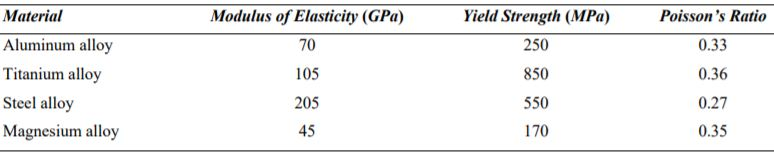

# Solution

Test 1:

$\sigma \le \frac{F}{A_o}$

In [6]:
F = Q_(35000, "N")
d = Q_(15, "mm")
A_o = math.pi * d**2 / 4
stress = F/A_o
print(stress.to("MPa").round(0))

198.0 megapascal


This will be our loading so our Magnesium alloy already fails

$E = \frac{\sigma}{\epsilon} \qquad \epsilon = \frac{\frac{F}{A_o}}{E}$

$\nu = \frac{\epsilon_{reduc}}{\epsilon_{long}} \qquad \nu \le \frac{\frac{\Delta l}{l}}{\epsilon}$

Combinding yeilds:

$\nu \le \frac{\frac{\Delta l}{l}}{\frac{\frac{F}{A_o}}{E}} \Rightarrow \nu \le E\frac{A\Delta l}{Fl}$

Now it's just a matter of plug and chug

In [7]:
l = Q_(15, "mm")
Delta_l = Q_(1.2e-2, "mm")

def test(name,nu,E):
    rh = E*(A_o*Delta_l)/(F*l)
    if(nu < rh):
        return name + " passes"
    else:
        return name + " fails"
    
print(test("Aluminum",0.33,Q_(70,"GPa")))
print(test("Titanium",0.36,Q_(105,"GPa")))
print(test("Steel",0.27,Q_(205,"GPa")))

Aluminum fails
Titanium passes
Steel passes


# Problem 6.39 

Determine the modulus of resilience for each of the following alloys using Table 6.1:

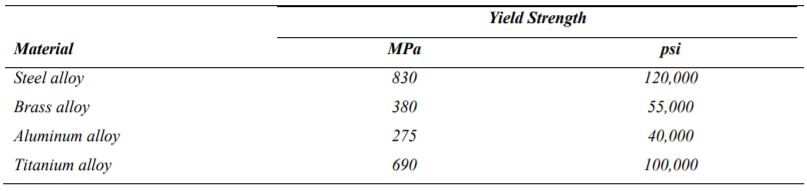

# Solution

Modulus of resilience $U_r = \int_o^\epsilon \sigma d\epsilon$
    
But while in the elastic range, $U_r = \frac{1}{2}\sigma_y\epsilon_y$

Rearranging with $E=\frac{\sigma}{\epsilon}$ yeilds our equation:

$U_r = \frac{\sigma_y^2}{2E}$

In [8]:
def resilience(name, strength_y, E):
    u =  (0.5 * strength_y**2 / E)
    print(("{}'s modulus of resilience is {}").format(name,u.to("kJ/m^3").round(2)))
    
resilience("Steel", Q_(830, "MPa"), Q_(207, "GPa")) #E is gathered from table 6.1
resilience("Brass", Q_(380, "MPa"), Q_(97, "GPa"))
resilience("Aluminum", Q_(275, "MPa"), Q_(69, "GPa"))
resilience("Titanium", Q_(690, "MPa"), Q_(107, "GPa"))

Steel's modulus of resilience is 1664.01 kilojoule / meter ** 3
Brass's modulus of resilience is 744.33 kilojoule / meter ** 3
Aluminum's modulus of resilience is 548.01 kilojoule / meter ** 3
Titanium's modulus of resilience is 2224.77 kilojoule / meter ** 3


# Problem 6.46 

For some metal alloy, a true stress of 345 MPa (50,000 psi) produces a plastic true strain of 0.02. How much does a specimen of this material elongate when a true stress of 415 MPa (60,000 psi) is applied if the original length is 500 mm (20 in.)? Assume a value of 0.22 for the strain-hardening exponent, n.

# Solution

$\sigma_T = \sigma(1+\epsilon) \qquad \epsilon_T = ln(1+\epsilon)$

$\sigma_T = K\epsilon_T^n \Rightarrow \sigma_T = K\epsilon_T^{0.22}$

First step is to solve for K using our given information:

$K = \frac{\sigma_T}{\epsilon_T^{0.22}}$

In [9]:
stress_T = Q_(345, "MPa")
strain_T = Q_(0.02, "dimensionless")

K = (stress_T)/(strain_T**0.22)
print(K)

815.8165212121679 megapascal


Now we can calculate our new $\epsilon_T$ for a different $\sigma_T$:

$\epsilon_T = (\frac{\sigma_T}{K})^{\frac{1}{0.22}}$

and recall $\epsilon_T = ln(1+\frac{\Delta l}{l_o})$:

$\Delta l = l_o(e^{(\frac{\sigma_T}{K})^{\frac{1}{0.22}}} - 1)$

In [10]:
stress_T = Q_(415, "MPa")
l_o = Q_(500, "mm")
Delta_l = l_o * (np.exp((stress_T/K)**(1/0.22)) - 1)

print(Delta_l.round(2))

23.7 millimeter
